In [1]:
# Test of feature detection and matching

# Import dependence
import cv2 
print('OpenCV version:', cv2.__version__)

import numpy as np
from matplotlib import pyplot as plt

OpenCV version: 3.4.2


In [2]:
#img0 = cv2.imread('../test_data/images_25/0000.png')
#img0[:,:,1],img0[:,:,2]=img0[:,:,2],img0[:,:,1]
#plt.imshow(img0,'gray'),plt.title('ORIGINAL')
#cv2.namedWindow("Image test") 
#cv2.imshow("Image test", img0) 
#cv2.waitKey (0)
#cv2.destroyAllWindows()



# kps: 730, descriptors: (730, 64)


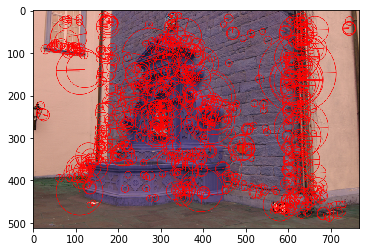

"\n# Create SURF object. You can specify params here or later.\n# Here I set Hessian Threshold to 400\nsurf = cv2.SURF(400)\n\n\n# Find keypoints and descriptors directly\nkp, des = surf.detectAndCompute(gray,None)\n\n# Check present Hessian threshold\nprint ('Hessian threshold:',surf.hessianThreshold)\nprint ('keypoint number',len(kp))\n\n# We set it to some 50000. Remember, it is just for representing in picture.\n# In actual cases, it is better to have a value 300-500\nsurf.hessianThreshold = 50000\n\n# Again compute keypoints and check its number.\nkp2, des2 = surf.detectAndCompute(gray,None)\nprint ('Hessian threshold:',surf.hessianThreshold)\nprint ('keypoint number for show',len(kp2))\n\nimg_with_kp = cv2.drawKeypoints(gray,kp2,None,(255,0,0),4)\n\nplt.imshow(img_with_kp),plt.show()\n"

In [3]:
img = cv2.imread('../test_data/images_25/0000.png')
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray = cv2.imread('../test_data/images_25/0000.png',cv2.IMREAD_GRAYSCALE)

# Here I set Hessian Threshold to 400
surf = cv2.xfeatures2d.SURF_create(400)

(kps, descs) = surf.detectAndCompute(gray, None)

#print ('Hessian threshold:',surf.)
print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))

img_with_kp = cv2.drawKeypoints(img,kps,None,(255,0,0),4)

plt.imshow(img_with_kp),plt.show()



'''
# Create SURF object. You can specify params here or later.
# Here I set Hessian Threshold to 400
surf = cv2.SURF(400)


# Find keypoints and descriptors directly
kp, des = surf.detectAndCompute(gray,None)

# Check present Hessian threshold
print ('Hessian threshold:',surf.hessianThreshold)
print ('keypoint number',len(kp))

# We set it to some 50000. Remember, it is just for representing in picture.
# In actual cases, it is better to have a value 300-500
surf.hessianThreshold = 50000

# Again compute keypoints and check its number.
kp2, des2 = surf.detectAndCompute(gray,None)
print ('Hessian threshold:',surf.hessianThreshold)
print ('keypoint number for show',len(kp2))

img_with_kp = cv2.drawKeypoints(gray,kp2,None,(255,0,0),4)

plt.imshow(img_with_kp),plt.show()
'''

In [ ]:
# Test of feature detection and matching
# Import dependence
import cv2 
print('OpenCV version:', cv2.__version__)
import numpy as np
from matplotlib import pyplot as plt


# Import Images
img1 = cv2.imread('../test_data/images_25/0000.png',cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('../test_data/images_25/0001.png',cv2.IMREAD_GRAYSCALE)

# Detect keypoints and extract the SURF descriptors
hessian_threshold=800
surf = cv2.xfeatures2d.SURF_create(hessian_threshold)
(kps1, descs1) = surf.detectAndCompute(img1, None)
print('[Img 1] # kps: {}, descriptors: {}'.format(len(kps1), descs1.shape))
(kps2, descs2) = surf.detectAndCompute(img2, None)
print("[Img 2] # kps: {}, descriptors: {}".format(len(kps2), descs2.shape))

# Brute-Force Matching
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descs1, descs2)
matches = sorted(matches, key = lambda x:x.distance, reverse=False) # small to big

matching_result = cv2.drawMatches(img1, kps1, img2, kps2, matches[ :50: ], None, flags=2)

# Show the result
img_kp_1 = cv2.drawKeypoints(img1, kps1, None,(0,0,255),4)
img_kp_2 = cv2.drawKeypoints(img2, kps2, None,(255,0,0),4)

cv2.imshow("Img1", img_kp_1)
cv2.imshow("Img2", img_kp_2)
cv2.imshow("Matching result", matching_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

OpenCV version: 3.4.2
[Img 1] # kps: 329, descriptors: (329, 64)
[Img 2] # kps: 354, descriptors: (354, 64)
